# Micrograd
So this guy is where we build a neural net from scratch.
We literally will make one, and perform back propagation by deriving some of the math


In [11]:
import numpy as np
import graphviz as gz
import matplotlib.pyplot as plt

%matplotlib inline


## Constructing ADT
Here we setup the initial ADT for discrete integer boxing, which will allow us to build a graph of operations that will eventually be topologically sorted to perform back propogation.
* One thing that i want to learn to do is write math formulas inline in markdown.  Please papa Andrej do this in the future.

In [12]:
class Value:
    def __init__(self, data, _children=(), _op=None, label=''):
        self.data = data
        self.label = label
        self._grad = 0.0
        self._children = set(_children)
        self._op = _op
    def __repr__(self) -> str:
        return f"Value({self.label}: {self.data: .4f})"

    def __add__(self, o) -> 'Value':
        o = o if isinstance(o, Value) else Value(o)
        return Value(self.data + o.data, (self, o), '+')

    def __mul__(self, o) -> 'Value':
        o = o if isinstance(o, Value) else Value(o)
        return Value(self.data * o.data, (self, o), '*')
    
    def __radd__(self, o) -> 'Value':
        return self + o
    def __rmul__(self, o) -> 'Value':
        return self * o


In [38]:
a = Value(4, label='a')
b = Value(3 , label='b')
c = a + b; c.label = 'c'
d = a * 3; d.label = 'd'
e = c * d + a + 3; e.label = 'e'

print(e._children)

print((a*a)._children)


{Value(:  3.0000), Value(:  88.0000)}
{Value(a:  4.0000)}


## Graphing the graph
Lets plot this sucker using graphviz. Turns out the api is pretty easy to use. We can use recursion to build up our nodes in BFS order.

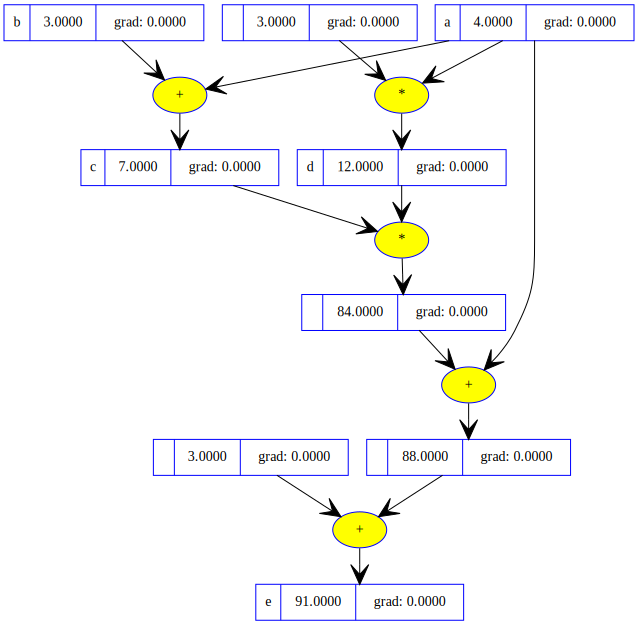

In [39]:
def graph_value(v: Value):
    visited = {}
    g = gz.Digraph('G', node_attr={'shape': 'record', 'color': 'blue'}, edge_attr={'arrowtype': 'normal', 'arrowhead': 'vee', 'arrowsize' : '2'})
    def ns(n: int, v : Value) -> str:
        g.node(str(n), f'{v.label}|{v.data : .4f}|grad: {v._grad: .4f}')
        if v._op is not None:
            n += 1
            g.node(str(n), v._op, shape='ellipse', style='filled', fillcolor='yellow')
            g.edge(str(n), str(n-1))
        n0 = n
        for v in v._children:
            assert(isinstance(n, int))
            if v not in visited:
                n0 =  n0 + 1
                n2 = ns(n0, v)
                g.edge(str(n0), str(n))
                visited[v] = str(n0)
                n0 = n2
            else:
                g.edge(visited[v], str(n))
        return n0
    ns(1,v)
    return g

graph_value(e)


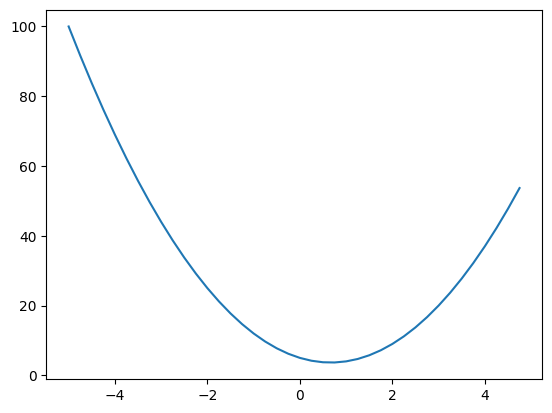

In [15]:
def f(x):
    return 3 * x** 2 - 4 * x + 5
xs = np.arange(-5, 5, .25)
ys = f(xs)

plt.plot(xs, ys)
